# Mann Whitney U-test

**What is an Mann Whitney U-test?**<br>
The Mann-Whitney U-test checks whether there is a difference between two independent groups (non-parametric counterpart of Independent T-test).<br>
While the T-test checks for a difference in means, Mann Whitney U-test checks for a difference in rank sum (therefore the data needs to be ordinal)<br>
Note that there is no need for the data to be normally distributed!<br>

*What is a rank sum?* <br>A rank is assigned to all participants across the samples, then the sum of the ranks is computed for each sample group.

<img src="/Images/ranksum.png" width=300>

## Data Import

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rnd
from random import sample
import statsmodels.api as sm
import scipy.stats as stats
import pingouin as pg

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [101]:
# Dataset of panic attacks between two samples divided into control and treatment groups
link = 'https://raw.githubusercontent.com/alexxvives/Significance_tests/main/Data/Utest_data.csv'
df = pd.read_csv(link)

df.head()

,control,treatment
0,7,3
1,5,6
2,6,4
3,4,2
4,12,1


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
control,7.0,7.285714,2.690371,4.0,5.5,7.0,8.5,12.0
treatment,7.0,3.142857,1.951800,1.0,1.5,3.0,4.5,6.0


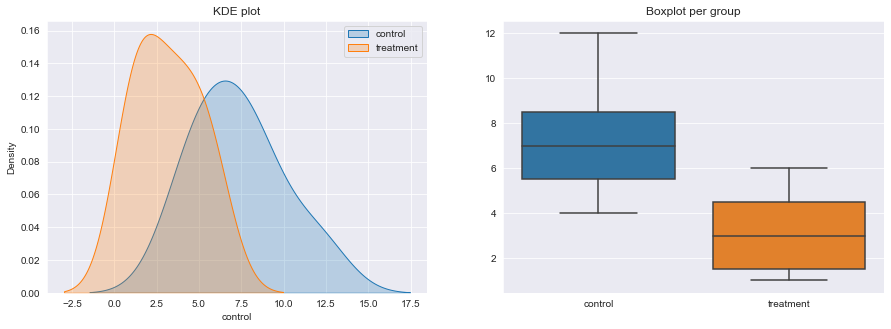

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(ax=axes[0], x=df['control'], shade=True, label='control')
sns.kdeplot(ax=axes[0], x=df['treatment'], shade=True, label='treatment')
axes[0].set_title("KDE plot")
sns.boxplot(ax=axes[1], data=df)
axes[1].set_title('Boxplot per group')

axes[0].legend()
plt.show()

## Hypothesis

$H_0$: The sum of ranks between the two sample groups is the same.<br>
$H_a$: The sum of ranks between the two sample groups is different.

## Assumptions

* Assumption 1: There is an ordinal dependent variable (panic attacks) and a categorical independent variable (control/treatment)
* Assumptions 2: The data is collected from a representative, randomly selected portion of the total population.

* If assumption 2 is failed, a Wilcoxon signed-rank test can be used.

## Mann Whitney U-test

In [84]:
result = pg.mwu(control, treatment, method='exact') # Method recommended for n<8
result

,U-val,alternative,p-val,RBC,CLES
MWU,44.5,two-sided,0.011072,-0.816327,0.908163


#### U statistic

Scipy documentation mentions that the outputed U corresponds to the first sample (control in this case), but the U-statistic is the minimum between the two.

In [93]:
n_control, n_treatment = len(df['control']), len(df['treatment'])
U1 = result['U-val'].values[0]
U2 = n_control*n_treatment - U1
U_score = min(U1, U2)
print('The U-statistic is {}'.format(U_score))

The U-statistic is 4.5


In [100]:
N = n_control + n_treatment
z = (U_score - n_control*n_treatment/2 + 0.5) / np.sqrt(n_control*n_treatment * (N + 1)/ 12)

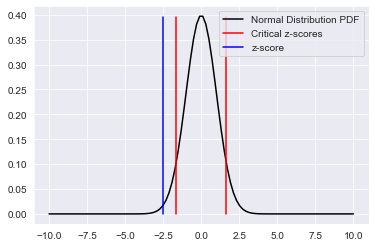

Critical z-scores: +-1.645 and z-score: -2.492


In [95]:
## Setup       
alpha = 0.05    # Significance level
tails = 2

## Calculate critical u
critical_z = stats.norm.ppf(q=1-alpha)

plt.figure()
xs = np.linspace(-10,10,100)
plt.plot(xs, stats.norm.pdf(xs), 'k', label="Normal Distribution PDF")
         
## Plot some vertical lines representing critical t-score cutoff
plt.axvline(critical_z, ymin=0.045, ymax=0.95, color='red', label='Critical z-scores')
if tails == 2: 
    plt.axvline(-critical_z, ymin=0.045, ymax=0.95, color='red')
plt.axvline(z, ymin=0.045, ymax=0.95, color='blue', label='z-score')
plt.legend()
plt.show()

print('Critical z-scores: +-{} and z-score: {}'.format(round(critical_z,3),round(float(z),3)))

## Conclusion

The results from the test based on the control group (M = 7.28, SD = 2695) and "After" data (M = 3.14, SD = 1.95) suggest that the treatment resulted in a reduction of panic attacks, U = 4.5, p < 0.05